In [ ]:
import plotly.graph_objects as go
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
#keep n even for best result
n=4
xl=5  #radius of cyclotron
efield=1    #amplitude of ef

#xb=np.append(np.linspace(-xl,-efield,n//2),np.linspace(efield,xl,n//2),axis=0)
xe=np.linspace(-efield,efield,n)
domain=np.linspace(-xl,xl,n)
x,y,z=np.meshgrid(domain,domain,domain)
xe,ye,ze=np.meshgrid(xe,domain,domain)
#xdomain

Text(0.5, 0, 'Z Axis')

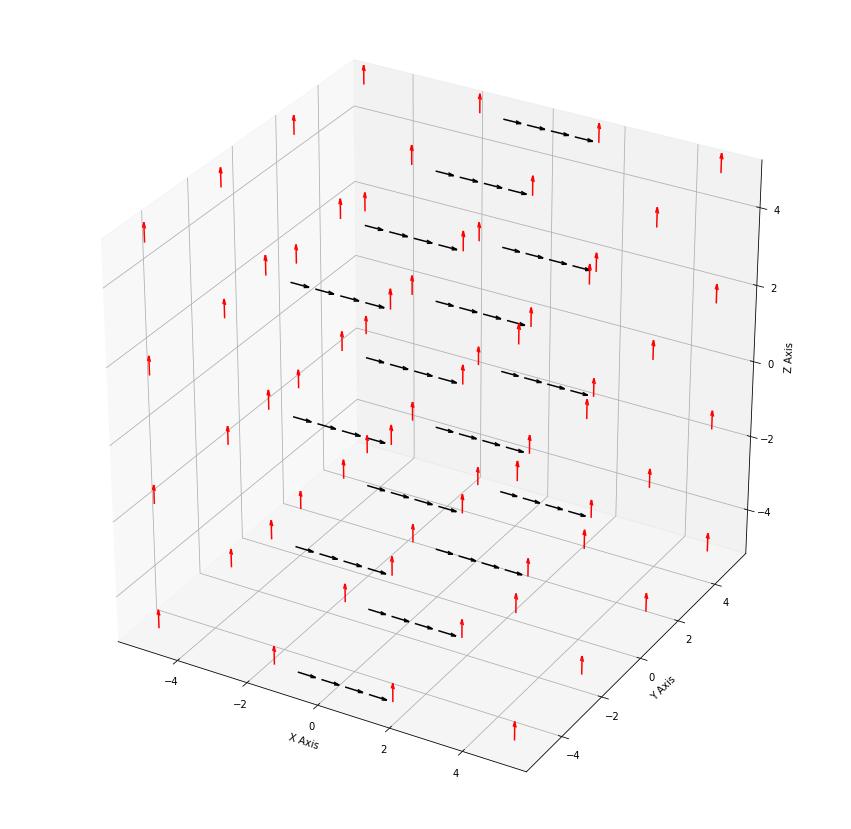

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=plt.axes(projection='3d')

ax.quiver(x,y,z,x*0,x*0,abs(z)*1,length=0.5,color='red',normalize=True)
ax.quiver(xe,ye,ze,abs(x)*1,y*0,z*0,length=0.5,color='k',normalize=True)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

#ax.plot([0,0],[0,0],[0,5])

In [ ]:
'''nc=50
center= np.ones(nc)
r=4
theta= np.linspace(0,np.pi,nc)
zc= np.linspace(1,3)
thetagrid,zcgrid= np.meshgrid(theta,zc)
xc= r*np.cos(theta)+center
yc= r*np.sin(theta)
ax.plot(xc,yc,zc,'k',alpha=0.5)'''

"nc=50\ncenter= np.ones(nc)\nr=4\ntheta= np.linspace(0,np.pi,nc)\nzc= np.linspace(1,3)\nthetagrid,zcgrid= np.meshgrid(theta,zc)\nxc= r*np.cos(theta)+center\nyc= r*np.sin(theta)\nax.plot(xc,yc,zc,'k',alpha=0.5)"

In [ ]:
def func(step,line,xyz):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(xyz[0:2, :step])    
    line.set_3d_properties(xyz[2, :step])
    return line, 

In [ ]:
step=135
dt=1e-3
q=4e+5
m=7e+3
v0=float(0)
Bz=5
E=1000
v=np.array([v0,0,0])
B=np.array([0,0,Bz])
xyz= np.array([[0],[0],[0]])
for i in range(step):
  if abs(xyz[0,i])>=0:
    v1=(np.cross(v,B)*q*dt)/m + np.array([np.sqrt(2*E*q*dt/m),0,0])
  else:
    E=-E
    v1=(np.cross(v,B)*q*dt)/m+ np.array([np.sqrt(2*E*q*dt/m),0,0])
  xyz=np.append(xyz,((v+v1).reshape((3,1)))*dt,axis=1)
  v+=v1
line = ax.plot(xyz[0], xyz[1],xyz[2], lw=2, c='g')[0]
#lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in xyz]


In [ ]:
xyz[0:2,:]

In [ ]:
anim = animation.FuncAnimation(fig, func, frames=step, fargs=(line,xyz), interval=200, blit=True)

In [ ]:
HTML(anim.to_html5_video())

ValueError: ignored

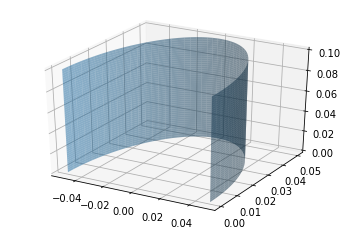

In [ ]:
import numpy as np

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0,0,0.05,0.1)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
n=50
x,y=np.meshgrid(np.linspace(0,0.5,n),np.linspace(-0.5,0.5,n))
xb=x[x<=Xc]
yb=
ax.plot_surface(,y[y<=Yc],Zc)
plt.show()